In [2]:
import numpy as np
import os
import json
import pycpd
from matplotlib import pyplot as plt

In [3]:
def extract_annotation(data):
    for item in data:
        if 'classification' in item['properties']:
            if item['properties']['classification']['name'] == 'Region*':
                annotation_list = []
                for sublist in item['geometry']['coordinates']:
                    for sublist2 in sublist:
                        for point in sublist2:
                            annotation_list.append(point)
                return np.array(annotation_list)

In [4]:
file_path_anno = ['data/Annotation-C.json', 
                  'data/Annotation-D.json',
                  'data/Annotation-E.json',
                  'data/Annotation-F.json',
                  'data/Annotation-G.json',
                  'data/Annotation-H.json']

x_annotations = []
y_annotations = []

for path in file_path_anno:
    annotation = []
    with open(path) as f:
        data = json.load(f)
    annotation = extract_annotation(data)
    x_annotation = annotation[:,0]
    x_annotations.append(x_annotation)
    y_annotation = annotation[:,1]
    y_annotations.append(y_annotation)

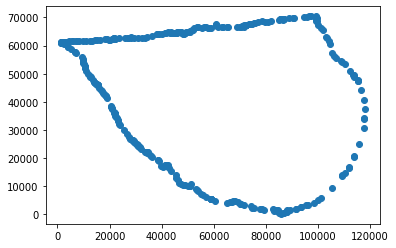

In [5]:
# Annotation C
plt.scatter(x_annotations[0],y_annotations[0])

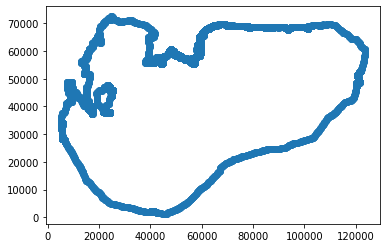

In [6]:
# Annotation D
plt.scatter(x_annotations[1],y_annotations[1])

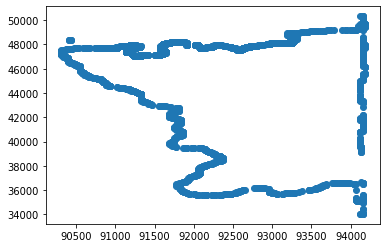

In [7]:
# Annotation E
plt.scatter(x_annotations[2],y_annotations[2])

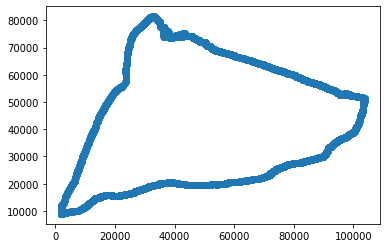

In [8]:
# Annotation F
plt.scatter(x_annotations[3],y_annotations[3])

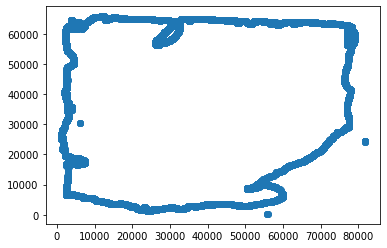

In [9]:
# Annotation G
plt.scatter(x_annotations[4],y_annotations[4])

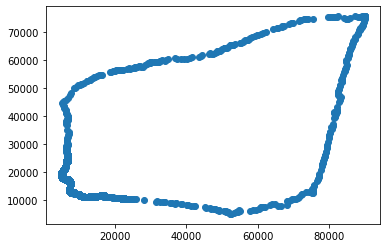

In [10]:
# Annotation H
plt.scatter(x_annotations[5],y_annotations[5])

In [11]:
file_path_cut = ['data/Schnitt-C.obj', 
                 'data/Schnitt-D.obj',
                 'data/Schnitt-E.obj',
                 'data/Schnitt-F.obj',
                 'data/Schnitt-G.obj',
                 'data/Schnitt-H.obj']
x_cuts = []
y_cuts = []

for path in file_path_cut:
    with open(path) as f:
        readlines = f.readlines()
    l = []
    for line in readlines:
        if line.startswith('l '):
            lines = line.split(' ')
            if lines[1] not in l:
                l.append(int(lines[1]))
            if lines[2] not in l:
                l.append(int(lines[2]))
                
    x_cut = []
    y_cut = []
    for index in l:
        splitted = readlines[index-1].split(' ')
        x_cut.append(float(splitted[3]))
        y_cut.append(float(splitted[1]))
    x_cuts.append(x_cut)
    y_cuts.append(y_cut)

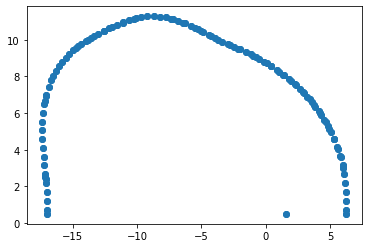

In [12]:
# Schnitt C
plt.scatter(x_cuts[0], y_cuts[0])

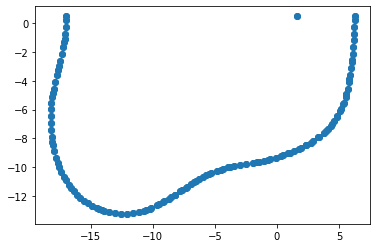

In [13]:
# Schnitt D
plt.scatter(x_cuts[1], y_cuts[1])

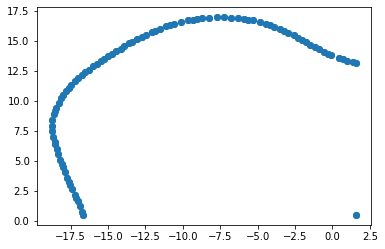

In [14]:
# Schnitt E
plt.scatter(x_cuts[2], y_cuts[2])

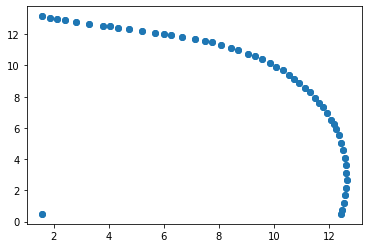

In [15]:
# Schnitt F
plt.scatter(x_cuts[3], y_cuts[3])

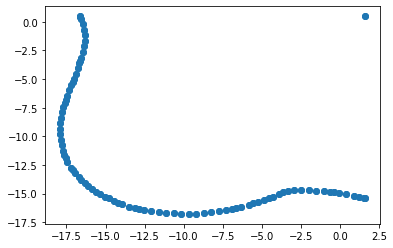

In [16]:
# Schnitt G
plt.scatter(x_cuts[4], y_cuts[4])

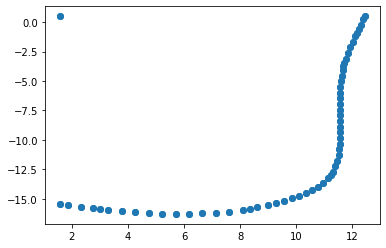

In [17]:
# Schnitt H
plt.scatter(x_cuts[5], y_cuts[5])

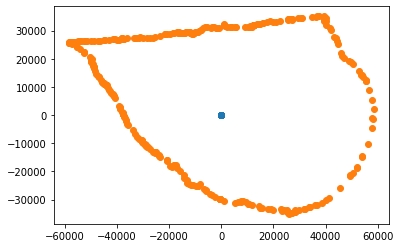

In [18]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
x_edited_anns=[]
y_edited_anns=[]
x_edited_cuts=[]
y_edited_cuts=[]

def center_list(list):
    #extrema bestimmen
    min_list=min(list)
    max_list=max(list)
    
    #vesrschiebung errechnen
    center=(min_list+max_list)/2
    
    #Punkte verschieben
    return_list=np.array(list)-center
    
    return return_list

for i in range(0, len(x_cuts)):
    x_edited_anns.append(center_list(x_annotations[i]))
    y_edited_anns.append(center_list(y_annotations[i]))
    x_edited_cuts.append(center_list(x_cuts[i]))
    y_edited_cuts.append(center_list(y_cuts[i]))
    
plt.scatter(x_edited_cuts[0],y_edited_cuts[0])
plt.scatter(x_edited_anns[0],y_edited_anns[0])

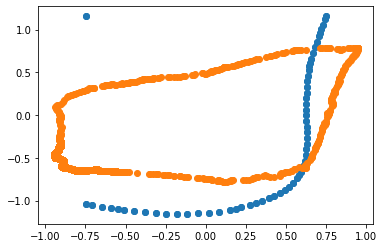

In [19]:
# *Abstände zum Nullpunkt normalisieren
def scale_lists(x_list,y_list):
    dists=np.sqrt(x_list**2 + y_list**2)
    avrg_dist=np.average(dists)
    scaled_x_list=x_list/avrg_dist
    scaled_y_list=y_list/avrg_dist
    return scaled_x_list, scaled_y_list

for i in range(0,len(x_edited_anns)):
    x_edited_anns[i],y_edited_anns[i]= scale_lists(x_edited_anns[i],y_edited_anns[i])
    
for i in range(0,len(x_edited_cuts)):
    x_edited_cuts[i],y_edited_cuts[i]= scale_lists(x_edited_cuts[i],y_edited_cuts[i])

plt.scatter(x_edited_cuts[5],y_edited_cuts[5])
plt.scatter(x_edited_anns[5],y_edited_anns[5])

<Figure size 432x288 with 0 Axes>

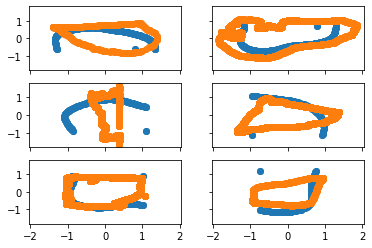

In [20]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(x_edited_anns[i],y_edited_anns[i])
    
#Ergebisse sind Falsch Rotiert und sehen hier verzerrt aus, aber die Ergenisse sollten okay sein 

In [21]:
# Flipping und Rotation für das Anpassen der Annotationen
def flip(x_list):
    new_x_list = []
    max_x=max(x_list)
    min_x=min(x_list)
    for x in x_list:
        new_x = min_x + max_x-x
        new_x_list.append(new_x)
    return new_x_list

def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
#    return list(np.moveaxis(a, axis, 0))


def rotate(x_list,y_list,radians):
    theta = np.radians(radians)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    new_coord_list =  []
    new_x_list = []
    new_y_list =  []
    arr = np.stack((x_list,y_list), axis=-1)
    for coord in arr:
        coord = coord.flatten()
        new_coord = R.dot(coord)
        new_coord_list.append(new_coord)
    new_coord_list = np.asfarray(new_coord_list)
    for coord in new_coord_list:
        x,y, = unstack(coord)
        new_x_list.append(x)
        new_y_list.append(y)
    return new_x_list, new_y_list
    
    

In [22]:
collection_x_anns =[]
collection_y_anns = []

# Datei C - vertikaler & horizontaler Flip
x_flipped_anns_c= flip(x_edited_anns[0])
y_flipped_anns_c = flip(y_edited_anns[0])
collection_x_anns.append(x_flipped_anns_c)
collection_y_anns.append(y_flipped_anns_c)

# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen
x_flipped_anns_d= x_edited_anns[1]
y_flipped_anns_d= y_edited_anns[1]
collection_x_anns.append(x_flipped_anns_d)
collection_y_anns.append(y_flipped_anns_d)

# Datei E - 90° Rotation
x_flipped_anns_e, y_flipped_anns_e= rotate(x_edited_anns[2], y_edited_anns[2],270)
collection_x_anns.append(x_flipped_anns_e)
collection_y_anns.append(y_flipped_anns_e)

# Datei F - vertikaler Flip - 25° Rotation
x_flipped_anns_f= x_edited_anns[3]
y_flipped_anns_f = flip(y_edited_anns[3])
x_flipped_anns_f, y_flipped_anns_f = rotate(x_flipped_anns_f, y_flipped_anns_f,335)
collection_x_anns.append(x_flipped_anns_f)
collection_y_anns.append(y_flipped_anns_f)

# Datei G - horizontaler Flip
x_flipped_anns_g= flip(x_edited_anns[4])
y_flipped_anns_g = y_edited_anns[4]
collection_x_anns.append(x_flipped_anns_g)
collection_y_anns.append(y_flipped_anns_g)

# Datei H - vertikaler & horizontaler Flip
x_flipped_anns_h= flip(x_edited_anns[5])
y_flipped_anns_h = flip(y_edited_anns[5])
collection_x_anns.append(x_flipped_anns_h)
collection_y_anns.append(y_flipped_anns_h)

In [23]:
# Umstrukturieren der Punkte
Y = np.array([x_edited_anns[0].tolist(),y_edited_anns[0].tolist()])
X = np.array([x_edited_cuts[0].tolist(),y_edited_cuts[0].tolist()])

<Figure size 432x288 with 0 Axes>

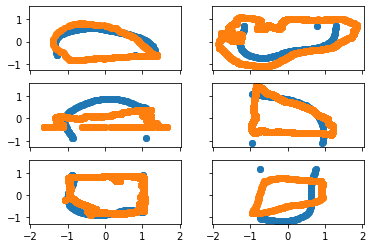

In [24]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [25]:
# *Upsampling - # Interpolation für mehr Punkte

def interpolate(x1, y1, center_x,center_y,midpoints_x, midpoints_y, ct):
    if midpoints_x == None and  midpoints_y == None:
        midpoints_x = []
        midpoints_y = []

    diff_m_x = (abs(x1-center_x)/ct)
    diff_m_y = (abs(y1-center_y)/ct)
    m_x = x1
    m_y = y1
    
    for i in range(0,ct):
        if x1 > center_x:
            m_x = m_x - diff_m_x
        elif x1 < center_x:
            m_x = m_x + diff_m_x
        if y1 > center_y:
            m_y = m_y - diff_m_y
        elif y1 < center_y:
            m_y = m_y + diff_m_y
        
        midpoints_x.append(m_x)
        midpoints_y.append(m_y)

    return midpoints_x, midpoints_y


<Figure size 432x288 with 0 Axes>

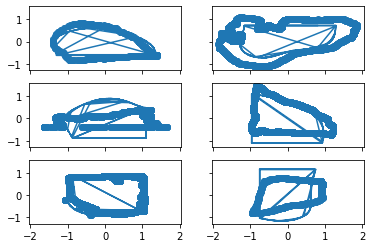

In [26]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)

for i in range(0,len(x_cuts)):

    x1 = x_edited_cuts[i][-2]
    y1 = y_edited_cuts[i][-2]#li. außen
    x2 = x_edited_cuts[i][-4]
    y2 = y_edited_cuts[i][-4]#re. außen
    c_x = x_edited_cuts[i][-1]
    c_y = y_edited_cuts[i][-1]#mitte
    

    
    #diff=len(collection_x_anns[i])-len(x_edited_cuts[i])
    #changed=False
    #if(diff%2==1):
    #    changed=True
    #    diff+=1
    midpoints_x1, midpoints_y1 = interpolate(x1, y1, c_x, c_y, None, None,int(50))
    #if(changed):
    #    diff-=1
    midpoints_x2, midpoints_y2 = interpolate(x2, y2, c_x, c_y,None, None,int(50))
    midpoints_x2 = np.array(midpoints_x2)
    midpoints_y2 = np.array(midpoints_y2)
    
    #print(len(x_edited_cuts[i]))
    #print(len(collection_x_anns[i]))
    #print(diff)
    #print(len(midpoints_x2))
    #print(len(midpoints_x1))
    #print("")
    
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x1)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y1)
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x2)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y2)
             

    
#plt.scatter( x_edited_cuts[0], y_edited_cuts[0])
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

In [27]:
# Interpolation 
# https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
# https://numpy.org/doc/stable/reference/generated/numpy.interp.html

for i in range(len(x_edited_cuts)): #geht durch alle annotationen 
    #vereinfache bennenung
    diff=len(collection_x_anns[i])-len(x_edited_cuts[i])
    xs = x_edited_cuts[i]  
    ys = y_edited_cuts[i]

    #plt.figure(figsize=(10,10))

    midpoints_x = []
    midpoints_y = []

    while (diff>0):
        for i_x in range(0,xs.shape[0]):
            idx1 = i_x
            idx2 = i_x+1
    
            if i_x == xs.shape[0]-1:
                idx2 = 0

            x1 = xs[idx1]
            x2 = xs[idx2]
            y1 = ys[idx1]
            y2 = ys[idx2]
            m_x = ((x1+x2)/2)
            m_y = ((y1+y2)/2)
            if(diff>0):
                midpoints_x.append(m_x)
                midpoints_y.append(m_y)
                diff=diff-1
    x_edited_cuts[i] = np.append(x_edited_cuts[i], midpoints_x)
    y_edited_cuts[i] = np.append(y_edited_cuts[i], midpoints_y)

    
    

In [28]:
diff=len(collection_x_anns[3])-len(x_edited_cuts[3])
print(diff)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(collection_x_anns[i],collection_y_anns[i])

0


In [30]:
from functools import partial
from pycpd import AffineRegistration
import time

iteration: 1
14.37999701499939
iteration: 2
14.205505132675171
iteration: 3
16.358490308125813
iteration: 4
16.394603669643402
iteration: 5
15.802182865142822
iteration: 6
15.074402372042337
iteration: 7
14.633059433528356
iteration: 8
14.241989314556122
iteration: 9
13.984101560380724
iteration: 10
13.94594144821167
iteration: 11
13.805174112319946
iteration: 12
13.772742887338003
iteration: 13
13.691608814092783
iteration: 14
13.629993898527962
iteration: 15
13.560960960388183
iteration: 16
13.493650883436203
iteration: 17
13.506495125153485
iteration: 18
13.487411922878689
iteration: 19
13.425469134983263
iteration: 20
13.399670696258545
iteration: 21
13.364138909748622
iteration: 22
13.326426202600652
iteration: 23
13.281712024108224
iteration: 24
13.2382240096728
iteration: 25
13.201715068817139
iteration: 26
13.204187549077547
iteration: 27
13.174032467382926
iteration: 28
13.159031323024205
iteration: 29
13.12763366205939
iteration: 30
13.11291253566742
iteration: 31
13.09493148

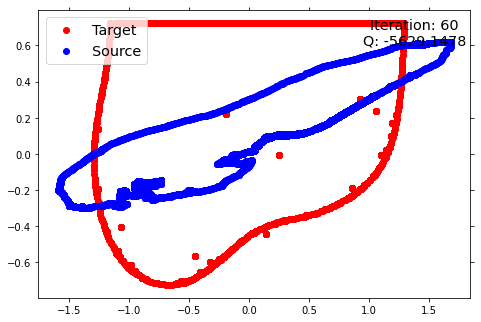

13.243097941080729
iteration: 61
13.227653726202544


In [28]:


start=0
end=1


def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==60):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)


# Umstrukturieren der Punkte
Y = np.array([collection_x_anns[1],collection_y_anns[1]])
X = np.array([x_edited_cuts[1].tolist(),y_edited_cuts[1].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=61)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()







iteration: 1
0.2714991569519043
iteration: 2
0.13724958896636963
iteration: 3
0.0926663875579834
iteration: 4
0.07037484645843506
iteration: 5
0.0568997859954834
iteration: 6
0.047999819119771324
iteration: 7
0.0414999212537493
iteration: 8
0.03662493824958801
iteration: 9
0.032888836330837674
iteration: 10
0.02989993095397949
iteration: 11
0.0274089899930087
iteration: 12
0.02537492911020915
iteration: 13
0.023615305240337666
iteration: 14
0.022142836025782993
iteration: 15
0.02086661656697591
iteration: 16
0.019718676805496216
iteration: 17
0.01870583085452809
iteration: 18
0.017833285861545138
iteration: 19
0.0170789266887464
iteration: 20
0.01637495756149292
iteration: 21
0.01578567141578311
iteration: 22
0.015249956737865101
iteration: 23
0.01476082594498344
iteration: 24
0.014333287874857584
iteration: 25
0.013919963836669921
iteration: 26
0.013557663330665002
iteration: 27
0.01324070824517144
iteration: 28
0.01292853696005685
iteration: 29
0.012655151301416857
iteration: 30
0.01

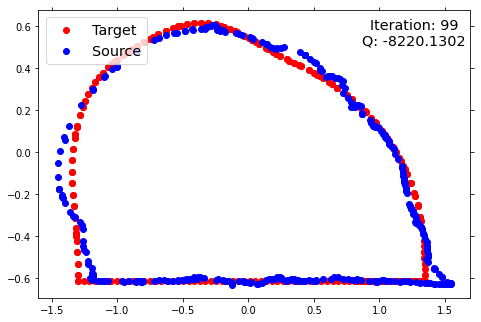

0.009090910054216481
iteration: 100
0.009060027599334717


In [31]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
    
Y = np.array([collection_x_anns[0],collection_y_anns[0]])
X = np.array([x_edited_cuts[0].tolist(),y_edited_cuts[0].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
0.25299787521362305
iteration: 2
0.22649908065795898
iteration: 3
0.2156660556793213
iteration: 4
0.21037471294403076
iteration: 5
0.20699973106384278
iteration: 6
0.20516633987426758
iteration: 7
0.20328562600272043
iteration: 8
0.20193734765052795
iteration: 9
0.20072219106886122
iteration: 10
0.20000007152557372
iteration: 11
0.1992271596735174
iteration: 12
0.19858316580454508
iteration: 13
0.1978461192204402
iteration: 14
0.19753563404083252
iteration: 15
0.1971665382385254
iteration: 16
0.1969687044620514
iteration: 17
0.1967353119569666
iteration: 18
0.19652771949768066
iteration: 19
0.1964736110285709
iteration: 20
0.1962749719619751
iteration: 21
0.1961191495259603
iteration: 22
0.19595455039631238
iteration: 23
0.1958913284799327
iteration: 24
0.1957916816075643
iteration: 25
0.19606005668640136
iteration: 26
0.19609614518972543
iteration: 27
0.19614821893197518
iteration: 28
0.19610715763909475
iteration: 29
0.19600006629680766
iteration: 30
0.19596667289733888


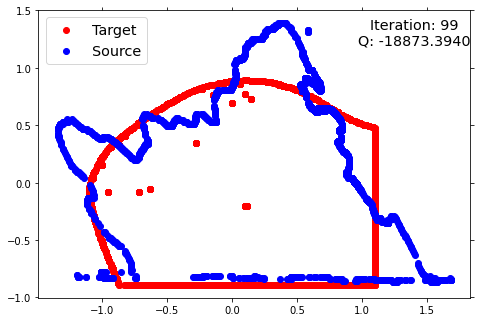

0.19678280329463457
iteration: 100
0.19669498682022094


In [32]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[2],collection_y_anns[2]])
X = np.array([x_edited_cuts[2].tolist(),y_edited_cuts[2].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1
12.243000030517578
iteration: 2
11.131750464439392
iteration: 3
10.761666695276896
iteration: 4
10.584375202655792
iteration: 5
10.426800775527955
iteration: 6
10.370667854944864
iteration: 7
10.326143026351929
iteration: 8
10.294187635183334
iteration: 9
10.251111030578613
iteration: 10
10.21910002231598
iteration: 11
10.195863723754883
iteration: 12
10.182166715463003
iteration: 13
10.157153936532827
iteration: 14
10.140749948365348
iteration: 15
10.136433362960815
iteration: 16
10.112531214952469
iteration: 17
10.07700008504531
iteration: 18
10.065499981244406
iteration: 19
10.062105266671432
iteration: 20
10.049925100803375
iteration: 21
10.04711903844561
iteration: 22
10.052272785793651
iteration: 23
10.049652213635651
iteration: 24
10.049020816882452
iteration: 25
10.041879968643189
iteration: 26
10.0280961898657
iteration: 27
10.01792593355532
iteration: 28
10.012875020503998
iteration: 29
10.005172441745627
iteration: 30
10.00745001633962
iteration: 31
10.005725945

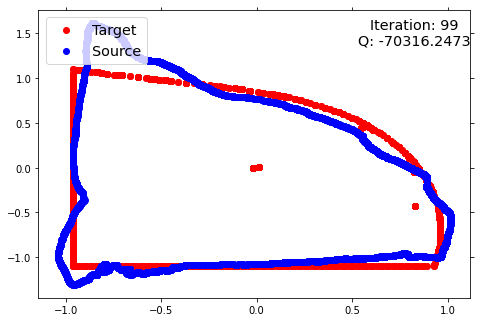

9.954398988473296
iteration: 100
9.952870018482209


In [33]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[3],collection_y_anns[3]])
X = np.array([x_edited_cuts[3].tolist(),y_edited_cuts[3].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

In [ ]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==99):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[4],collection_y_anns[4]])
X = np.array([x_edited_cuts[4].tolist(),y_edited_cuts[4].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


#dictio=({'X': X, 'Y': Y})
#start=time.time()
#reg = AffineRegistration(**dictio,max_iterations=100)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
#reg.register(callback)
#plt.show()

iteration: 1
3.0979976654052734
iteration: 2
2.786498785018921
iteration: 3
2.7001658280690513
iteration: 4
2.643999457359314
iteration: 5
2.610999584197998
iteration: 6
2.587499658266703
iteration: 7
2.5669996397835866
iteration: 8
2.547062247991562
iteration: 9
2.536999914381239
iteration: 10
2.5269498109817503
iteration: 11
2.524863589893688
iteration: 12
2.518416484196981
iteration: 13
2.5161152069385233
iteration: 14
2.5137141261781966
iteration: 15
2.513366524378459
iteration: 16
2.5114686191082
iteration: 17
2.510617536656997
iteration: 18
2.5111109945509167
iteration: 19
2.5117893344477604
iteration: 20
2.5112000942230224
iteration: 21
2.509904634384882
iteration: 22
2.5087953480807217
iteration: 23
2.508065130399621
iteration: 24
2.507895747820536
iteration: 25
2.506179914474487
iteration: 26
2.5070960705096903
iteration: 27
2.504314722838225
iteration: 28
2.504910639354161
iteration: 29
2.502224058940493
iteration: 30
2.501516588528951
iteration: 31
2.499903163602275
iteratio

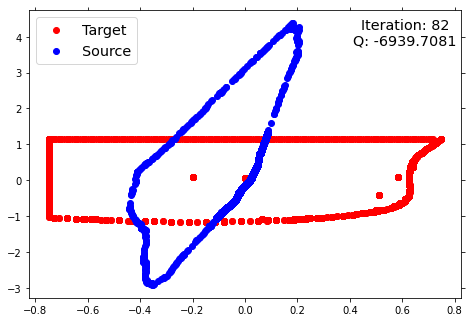

2.5003474282055365
iteration: 83
2.4993131132010955


In [31]:
def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    if(iteration==82):
        plt.cla()
        ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
        ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
        plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
            iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
        ax.legend(loc='upper left', fontsize='x-large')
        plt.draw()
        plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
       
Y = np.array([collection_x_anns[5],collection_y_anns[5]])
X = np.array([x_edited_cuts[5].tolist(),y_edited_cuts[5].tolist()])
X=np.swapaxes(X, 0, 1)
Y=np.swapaxes(Y, 0, 1)


xLabels = ["X1", "X2", "X3"]
yLabels = ["Y1", "Y2", "Y3"]

fig = plt.figure()
fig.add_axes([0, 0, 1, 1])
callback = partial(visualize, ax=fig.axes[0])


dictio=({'X': X, 'Y': Y})
start=time.time()
reg = AffineRegistration(**dictio,max_iterations=83)
#new_pc=reg.transform_point_cloud(Y)
#print(new_pc)
#plt.show()
reg.register(callback)
plt.show()

iteration: 1


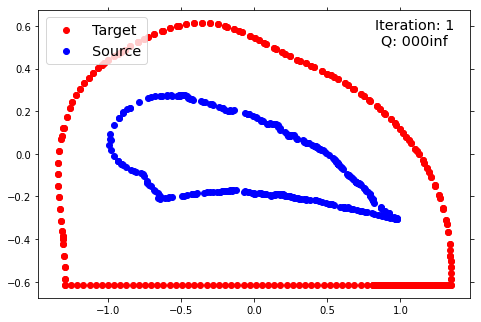

0.15849757194519043
iteration: 2


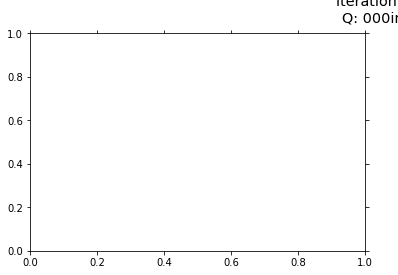

0.14124882221221924
iteration: 3


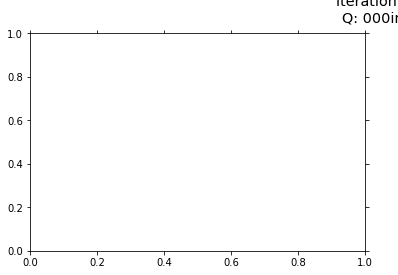

0.13549908002217612
iteration: 4


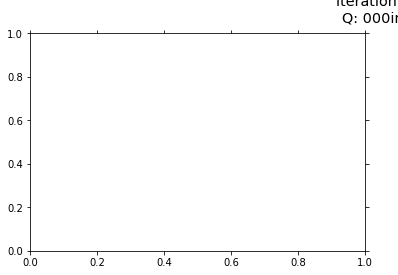

0.1326243281364441
iteration: 5


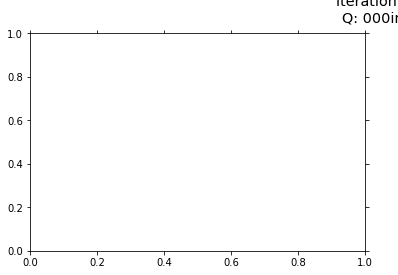

0.1308995246887207
iteration: 6


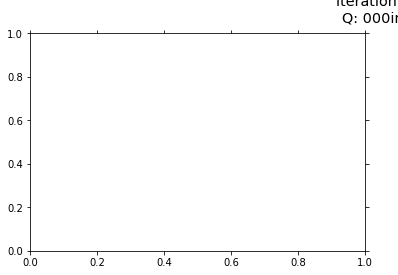

0.1323329210281372
iteration: 7


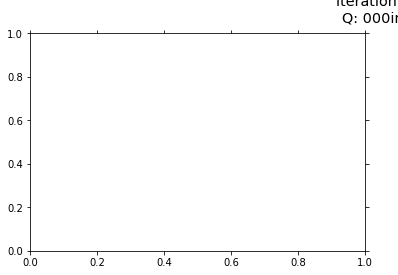

0.1311424800327846
iteration: 8


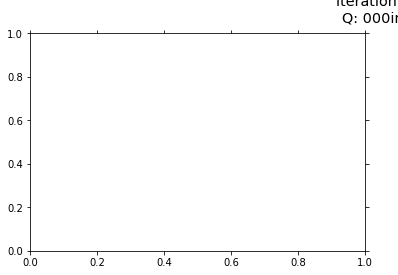

0.13024967908859253
iteration: 9


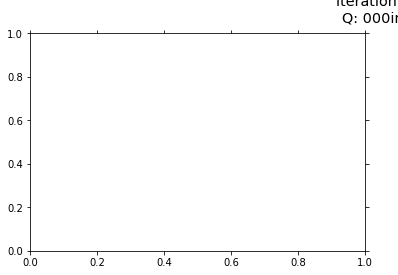

0.12955527835422093
iteration: 10


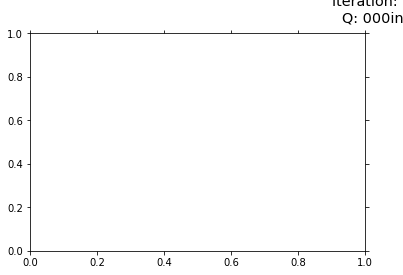

0.13209974765777588
iteration: 11


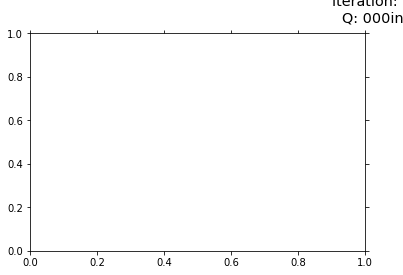

0.13136347857388583
iteration: 12


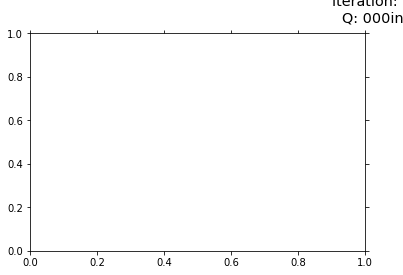

0.130749781926473
iteration: 13


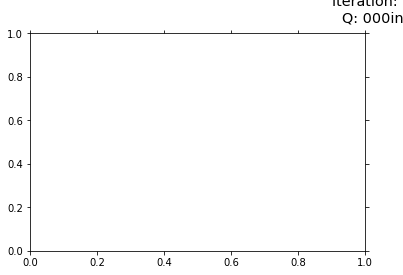

0.13023057350745568
iteration: 14


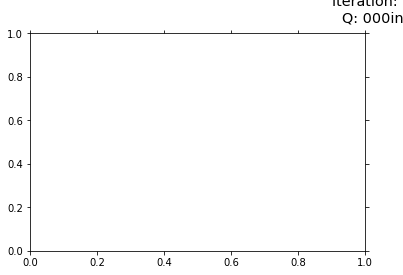

0.12978553771972656
iteration: 15


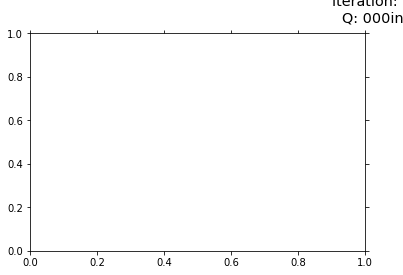

0.12939982414245604
iteration: 16


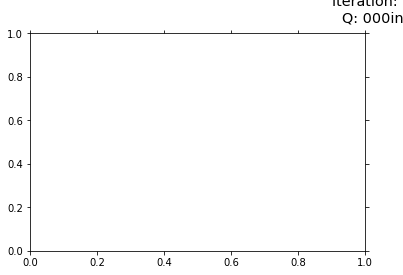

0.13003109395503998
iteration: 17


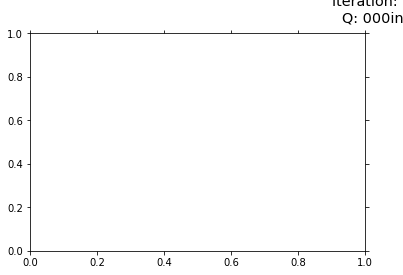

0.12967631396125345
iteration: 18


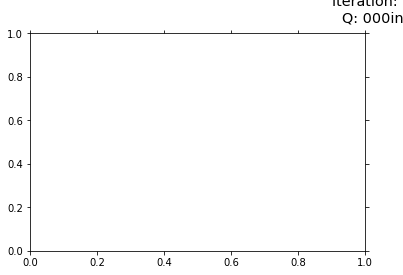

0.12936166922251383
iteration: 1


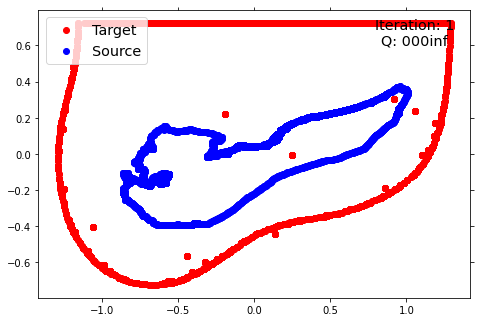

131.86295104026794
iteration: 2


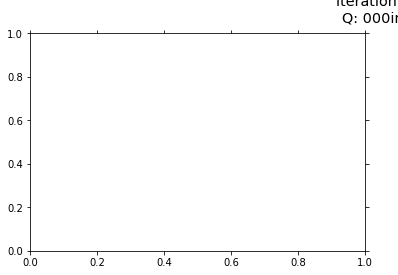

119.27543473243713


In [ ]:
from pycpd import DeformableRegistration

def visualize(iteration, error, X, Y, ax):
    print("iteration:" ,iteration)
    plt.cla()
    ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
    plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
        iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()
    plt.pause(0.001)
    end = time.time()
    print((end - start)/iteration)
for i in range(len(x_edited_cuts)):
    Y = np.array([collection_x_anns[i],collection_y_anns[i]])
    X = np.array([x_edited_cuts[i].tolist(),y_edited_cuts[i].tolist()])
    X=np.swapaxes(X, 0, 1)
    Y=np.swapaxes(Y, 0, 1)


    xLabels = ["X1", "X2", "X3"]
    yLabels = ["Y1", "Y2", "Y3"]

    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    callback = partial(visualize, ax=fig.axes[0])


    dictio=({'X': X, 'Y': Y})
    start=time.time()
    reg = DeformableRegistration(**dictio)

    reg.register(callback)
    plt.show()